# Table of Contents
* [Benchmarks](#Benchmarks)
	* [1. EggNOG-mapper vs BLAST](#1.-EggNOG-mapper-vs-BLAST)
	* [2. EggNOG-mapper vs InterProScan](#2.-EggNOG-mapper-vs-InterProScan)
	* [3. EggNOG-mapper vs CAFA2](#3.-EggNOG-mapper-vs-CAFA2)
		* [CAFA2 Evaluation code](#CAFA2-Evaluation-code)
			* [Results](#Results)
		* [CAFA2 Reference data](#CAFA2-Reference-data)
	* [4. EggNOG-mapper vs non-model organisms](#4.-EggNOG-mapper-vs-non-model-organisms)
	* [5. EggNOG-mapper vs InterProScan with metagenomics data](#5.-EggNOG-mapper-vs-InterProScan-with-metagenomics-data)
		* [Sample-0](#Sample-0)
		* [Sample-1](#Sample-1)
		* [Sample-2](#Sample-2)
		* [Sample-3](#Sample-3)


In [1]:
%matplotlib auto
import cPickle
import plot_functions
reload(plot_functions)
bench = cPickle.load(open('all_benchmark_tables.pkl'))


Using matplotlib backend: MacOSX


/Users/jhc/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# Benchmarks 

## 1. EggNOG-mapper vs BLAST 

In [2]:
plot_functions.get_emapper_blast_summary(bench, refresh_plots=True)

## 2. EggNOG-mapper vs InterProScan

In [3]:
plot_functions.get_emapper_interpro_summary(bench, refresh_plots=True)

## 3. EggNOG-mapper vs CAFA2

CAFA2 benchmark was performed using the [cafa2 emapper branch](https://github.com/jhcepas/eggnog-mapper/tree/cafa2), where only the CAFA2 trained set was used for annotation. 

EggNOG-mapper was run in diamond mode with default options (`--tax_scope auto --orthologs all`)



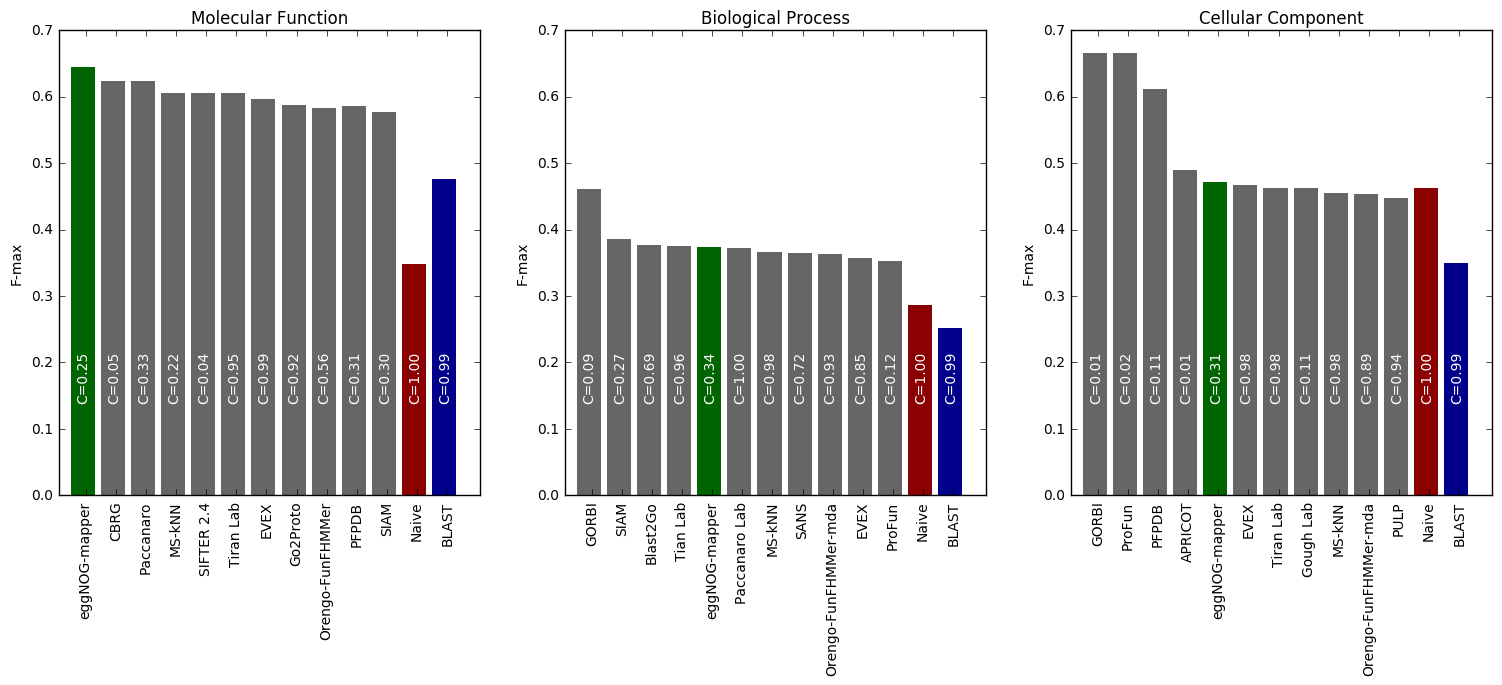

In [4]:
%matplotlib inline
plot_functions.plot_cafa2_benchmark()

### CAFA2 Evaluation code 

Code based on the official Matlab CAFA2 [benchmarking scripts](https://github.com/yuxjiang/CAFA2#how-to-evaluate-your-own-predictions-on-cafa2-benchmarks)

```
for j = {'MFO', 'BPO', 'CCO'} 
  ont = j{1};
  
  target_ont_file = sprintf('../ontology/%s.mat',upper(ont)) ;
  target_truth_file = sprintf('../benchmark/groundtruth/%sa.mat', lower(ont));
  target_list_file = sprintf('../benchmark/lists/%s_all_NK.txt', lower(ont));
  load(target_ont_file);
  load(target_truth_file);
  target_ont = eval(ont);
  benchmark = pfp_loaditem(target_list_file, 'char');
  
  pred = cafa_import('../../emapper/all_seqs_filtered.dmnd-all.emapper.annotations.cafa2', target_ont, false); 
  cm_seq = pfp_seqcm(benchmark, pred, oa, 'toi', 'noroot')
  pr = pfp_convcmstruct(cm_seq, 'pr', 'beta', 1.0);
  prcurve = cafa_eval_seq_curve('1', benchmark, pr, 'partial');
  fmax = pfp_seqmetric(benchmark, pred, oa, 'fmax', 'evmode', 'partial');
  fprintf('(fmax/partial mode) all %s NK emapper (diamond-all): %f  %f\n', ont, fmax, prcurve.coverage);

end
```

#### Results

```
                                                      fmax      coverage
(fmax/partial mode) all MFO NK emapper (diamond-all): 0.644708  0.249406
(fmax/partial mode) all BPO NK emapper (diamond-all): 0.374488  0.343023
(fmax/partial mode) all CCO NK emapper (diamond-all): 0.471405  0.305004

```

### CAFA2 Reference data

```
      MFO                             BPO                               CCO
  fmax  cov.                      fmax  cov.                        fmax  cov.
  0.645 0.25 eggNOG-mapper **     0.461 0.09 GORBI                  0.666 0.01 GORBI                   
  0.624 0.33 Paccanaro            0.386 0.27 SIAM                   0.666 0.02 ProFun                  
  0.623 0.05 CBRG                 0.377 0.69 Blast2Go               0.612 0.11 PFPDB                   
  0.606 0.22 MS-kNN               0.375 0.96 Tian Lab               0.489 0.01 APRICOT                 
  0.606 0.04 SIFTER 2.4           0.374 0.34 eggNOG-mapper **       0.471 0.31 eggNOG-mapper  **
  0.605 0.95 Tiran Lab            0.372 1.00 Paccanaro Lab          0.467 0.98 EVEX                    
  0.596 0.99 EVEX                 0.366 0.98 MS-kNN                 0.462 0.98 Tiran Lab               
  0.588 0.92 Go2Pro               0.365 0.72 SANS                   0.462 0.11 Gough Lab               
  0.583 0.56 Orengo-FunFHMMer     0.364 0.93 Orengo-FunFHMMer-mda   0.455 0.98 MS-kNN                  
  0.586 0.31 PFPDB                0.358 0.85 EVEX                   0.454 0.89 Orengo-FunFHMMer-mda    
  0.577 0.30 SIAM                 0.352 0.12 ProFun                 0.448 0.94 PULP                    
```

- ./Supplementary_data/sheet/mfo_all/mfo_all_NK_partial_all_fmax_sheet.csv
- ./Supplementary_data/sheet/bpo_all/bpo_all_NK_partial_all_fmax_sheet.csv
- ./Supplementary_data/sheet/cco_all/cco_all_NK_partial_all_fmax_sheet.csv

## 4. EggNOG-mapper vs non-model organisms

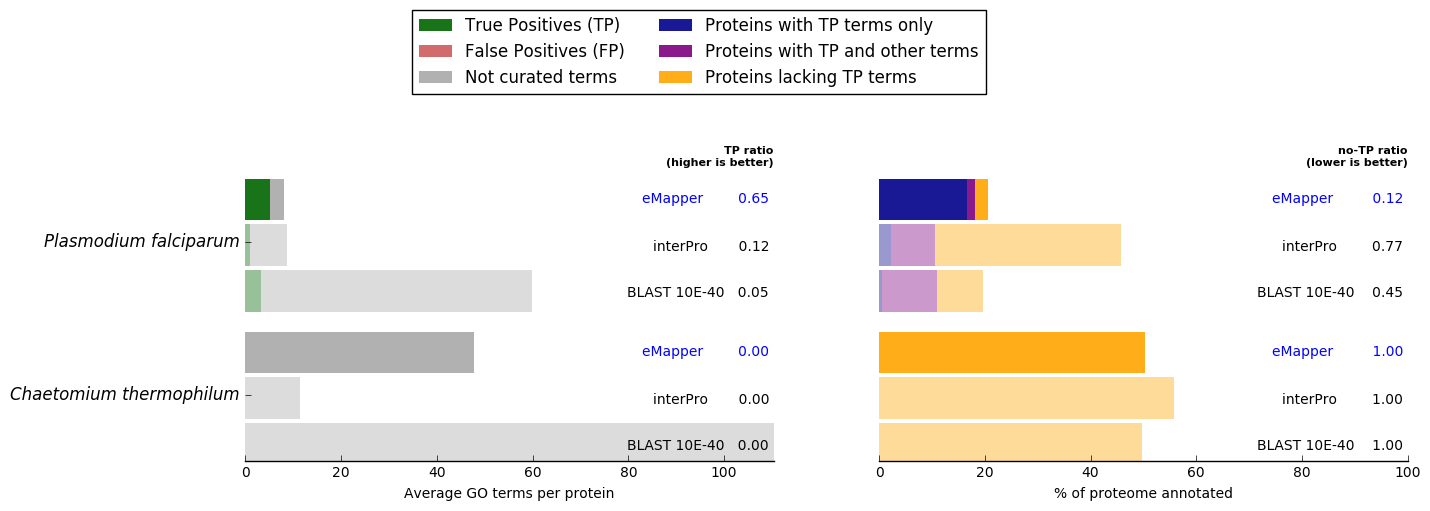

In [5]:
import plot_functions
reload(plot_functions)
tag = 'hmmer.all.auto.non-electronic'
plot_functions.plot_general_benchmark(bench[tag], ['5833', '759272'], tag)


## 5. EggNOG-mapper vs InterProScan with metagenomics data




### Sample-0

GOs from reads: 2821   GOs from emapper: 3177   GOs from ipro: 1375

```
GO terms in either prediction or truth
 Spearman: groundtruth vs emapper  R=0.460359 e-value=5.30463e-206
 Spearman: groundtruth vs interpro R=0.114974 e-value=5.50092e-10
GO terms in both prediction or truth
 Spearman: groundtruth vs emapper  R=0.737651 e-value=0
 Spearman: groundtruth vs interpro R=0.592108 e-value=6.34404e-124
GO terms only in groundtruth (2821):
 Spearman: groundtruth vs emapper  R=0.699588 e-value=0
 Spearman: groundtruth vs interpro R=0.149378 e-value=1.52114e-15
----------------------------------------------------------------------------------------------------
```

### Sample-1 

GOs from reads: 2857   GOs from emapper: 3483   GOs from ipro: 1415

```
GO terms in either prediction or truth
 Spearman: groundtruth vs emapper  R=0.442596 e-value=1.69853e-202
 Spearman: groundtruth vs interpro R=0.0968784 e-value=1.45166e-07
GO terms in both prediction or truth
 Spearman: groundtruth vs emapper  R=0.718772 e-value=0
 Spearman: groundtruth vs interpro R=0.57755 e-value=8.62059e-120
GO terms only in groundtruth (2857):
 Spearman: groundtruth vs emapper  R=0.68179 e-value=0
 Spearman: groundtruth vs interpro R=0.130658 e-value=2.36971e-12
----------------------------------------------------------------------------------------------------
```

### Sample-2

GOs from reads: 2784   GOs from emapper: 3024   GOs from ipro: 1188

```
GO terms in either prediction or truth
 Spearman: groundtruth vs emapper  R=0.425941 e-value=6.44606e-172
 Spearman: groundtruth vs interpro R=0.186137 e-value=1.64946e-23
GO terms in both prediction or truth
 Spearman: groundtruth vs emapper  R=0.735434 e-value=1.97626e-323
 Spearman: groundtruth vs interpro R=0.613267 e-value=1.63207e-118
GO terms only in groundtruth (2784):
 Spearman: groundtruth vs emapper  R=0.700252 e-value=0
 Spearman: groundtruth vs interpro R=0.220734 e-value=4.54679e-32
----------------------------------------------------------------------------------------------------
```

### Sample-3

GOs from reads: 2753   GOs from emapper: 3213   GOs from ipro: 1335

```
GO terms in either prediction or truth
 Spearman: groundtruth vs emapper  R=0.439518 e-value=4.6571e-188
 Spearman: groundtruth vs interpro R=0.110921 e-value=3.10748e-09
GO terms in both prediction or truth
 Spearman: groundtruth vs emapper  R=0.74601 e-value=0
 Spearman: groundtruth vs interpro R=0.572135 e-value=1.68626e-109
GO terms only in groundtruth (2753):
 Spearman: groundtruth vs emapper  R=0.693588 e-value=0
 Spearman: groundtruth vs interpro R=0.152374 e-value=9.11198e-16
----------------------------------------------------------------------------------------------------
```